## 1. Develop a program to extract data from the given wav files, snsd.wav and obama2.wav.

### a. Import libraries

In [97]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
import scipy.signal as signal
import numpy as np
import wave
import sys

from IPython.display import Audio, display, HTML
from ipywidgets import interact

from scipy.io import wavfile
import requests

%matplotlib inline
matplotlib.rcParams['animation.writer'] = 'avconv'
matplotlib.rcParams['figure.figsize'] = "8,3"

pathToDirectory = r"D:\Users\Ervie John\Documents\4th year 1st sem\Digital Signal Processing and Application\Module 2\Activity 2"

### b. Extract the audio

In [98]:
def loadAudio(url, start, length):

    rate, data = wavfile.read(url)
    if len(data.shape) > 1:
        data = data.sum(axis=1)
    data = (1.0 * data / abs(data).max()).astype(np.float32)
    return rate, data[rate*start+np.arange(rate*length)]

url_voice = "dataset for activity 2/obama2.wav"
url_music =  "dataset for activity 2/snsd.wav"
rate_voice, data_voice = loadAudio(url_voice, 0, 15)
rate_music, data_music = loadAudio(url_music, 0, 15)

## 2. Capture the first few seconds of the audio signals and apply an aliasing filter to it.

In [99]:
def presentAliasingAudio(original, rate, factor):
    down_aliased = original[::factor] # dumb downsampling, no anti-aliasing
    b = signal.firwin(155, 1.0/factor-0.01); a=1  # design the AAF
    lowpass = signal.lfilter(b, a, original)      # apply the AAF
    down_nonaliased = lowpass[::factor]           # perform Downsampling

    '''
    display(HTML("Original:"), Audio(data=original, rate=rate))
    print(np.mean(original))
    plt.figure(1)
    plt.title("Signal Wave...")
    print("mean power: " + str(np.mean(original)))
    print("deviation: " + str(np.std(original)))
    plt.plot(original)
    plt.show()
    '''    

    display(HTML("With Aliasing:"), Audio(data=down_aliased, rate=rate/factor))
    #print("mean power: " + str(np.mean(down_aliased)))
    #print("deviation: " + str(np.std(down_aliased)))
    #plt.figure(1)
    #plt.title("Signal Wave...")
    #plt.plot(down_aliased)
    #plt.show()

### a. aliased obama2.wav

In [100]:
presentAliasingAudio(data_voice, rate_voice, 6)

### b. aliased snsd.wav

In [101]:
presentAliasingAudio(data_music, rate_music, 6)

## 3. Reconstruct the signal using a preferred DAC method.

## 4. Compare and contrast the two versions (original and aliased) using descriptive and statistical means.

In [102]:
def compareOriginalAliased(original, rate, factor):
    down_aliased = original[::factor] # dumb downsampling, no anti-aliasing
    #b = signal.firwin(155, 1.0/factor-0.01); a=1  # design the AAF
    #lowpass = signal.lfilter(b, a, original)      # apply the AAF
    #down_nonaliased = lowpass[::factor]           # perform Downsampling

    display(HTML("Original:"), Audio(data=original, rate=rate))
    print(np.mean(original))
    plt.figure(1)
    plt.title("Signal Wave...")
    print("mean power: " + str(np.mean(original)))
    print("deviation: " + str(np.std(original)))
    plt.plot(original)
    plt.show()   

    display(HTML("Aliased:"), Audio(data=down_aliased, rate=rate/factor))
    print("mean power: " + str(np.mean(down_aliased)))
    print("deviation: " + str(np.std(down_aliased)))
    plt.figure(2)
    plt.title("Signal Wave...")
    plt.plot(down_aliased)
    plt.show()

### a. original and aliased obama2.wav

2.2859835e-05
mean power: 2.2859835e-05
deviation: 0.052557915


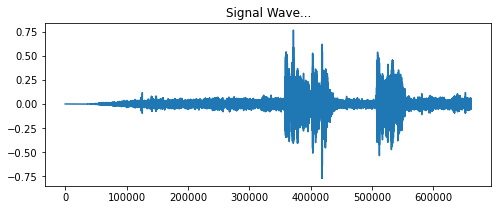

mean power: 5.4189262e-05
deviation: 0.052600697


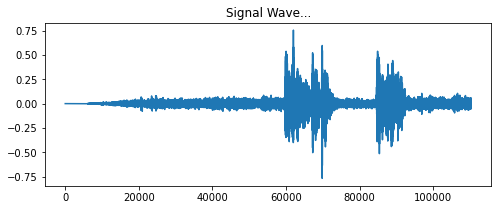

In [103]:
compareOriginalAliased(data_voice, rate_voice, 6)

### b. original and aliased snsd.wav

2.5627176e-05
mean power: 2.5627176e-05
deviation: 0.27828807


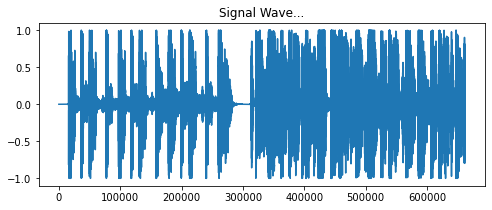

mean power: 1.9564466e-05
deviation: 0.27834904


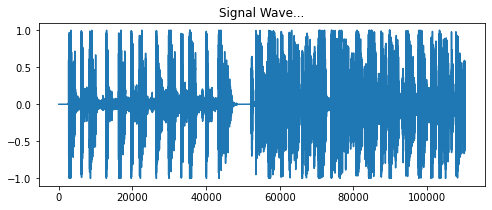

In [104]:
compareOriginalAliased(data_music, rate_music, 6)

### Compare and Contrast of obama2.wav

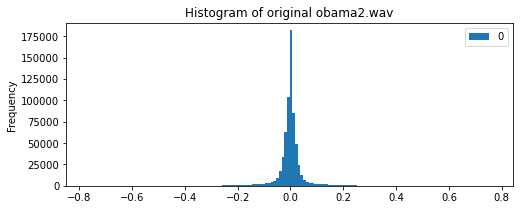

<Figure size 576x216 with 0 Axes>

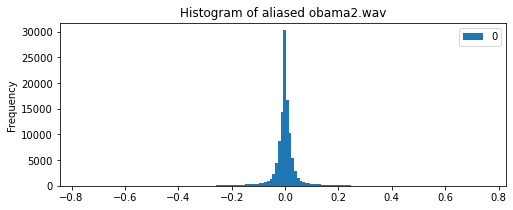

<Figure size 576x216 with 0 Axes>

In [108]:
import pandas as pd

factor = 6
down_aliased = data_voice[::factor]
  
# orignal
# Calling DataFrame constructor on list
df = pd.DataFrame(data_voice)
Hist_title = "Histogram of original obama2.wav"
df.plot(kind='hist', title=Hist_title, bins = 150)
plt.savefig(Hist_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
plt.show()
plt.clf() # to clear the current plot to make new

# aliased
# Calling DataFrame constructor on list
df = pd.DataFrame(down_aliased)
Hist_title = "Histogram of aliased obama2.wav"
df.plot(kind='hist', title=Hist_title, bins = 150)
plt.savefig(Hist_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
plt.show()
plt.clf() # to clear the current plot to make new

### Compare and Contrast of snsd.wav

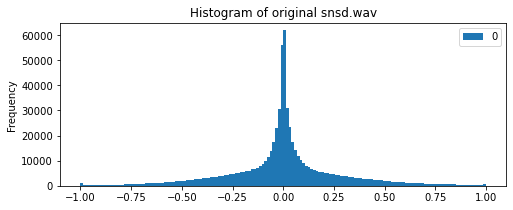

<Figure size 576x216 with 0 Axes>

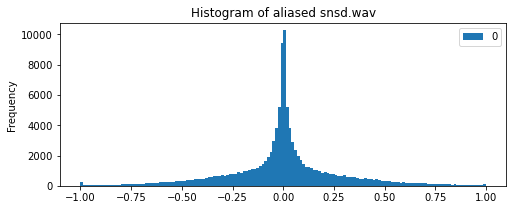

<Figure size 576x216 with 0 Axes>

In [109]:
import pandas as pd

factor = 6
down_aliased = data_music[::factor]
  
# original   
# Calling DataFrame constructor on list
df = pd.DataFrame(data_music)
Hist_title = "Histogram of original snsd.wav"
df.plot(kind='hist', title=Hist_title, bins = 150)
plt.savefig(Hist_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
plt.show()
plt.clf() # to clear the current plot to make new


# aliased
# Calling DataFrame constructor on list
df = pd.DataFrame(down_aliased)
Hist_title = "Histogram of aliased snsd.wav"
df.plot(kind='hist', title=Hist_title, bins = 150)
plt.savefig(Hist_title+'.png', facecolor='white', transparent=False) # saving the plot into png file
plt.show()
plt.clf() # to clear the current plot to make new